In [35]:
import pandas as pd

ori_data = pd.read_csv('data/薪资.csv', encoding='utf-8')
ori_data.head()

,公司,职位,学历,薪资是否超过100k
0,Google,销售主管,学士,否
1,Google,销售主管,硕士,否
2,Google,业务经理,学士,是
3,Google,业务经理,硕士,是
4,Google,计算机程序员,学士,否


In [36]:
# 导入sklearn的预处理子模块
from sklearn import preprocessing

# 标签编码器，用于转换分类数据
label_encoder = preprocessing.LabelEncoder()
# 将每列的分类数据转成数字，才能传递给模型
data =pd.DataFrame()
data['公司']= label_encoder.fit_transform(ori_data['公司'])
data['职位']= label_encoder.fit_transform(ori_data['职位'])
data['学历']= label_encoder.fit_transform(ori_data['学历'])
data['薪资是否超过100k'] = label_encoder.fit_transform(ori_data['薪资是否超过100k'])
data.head()

,公司,职位,学历,薪资是否超过100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


In [37]:
# 将数据集的特征X和标签Y分开
feature_cols = ['公司','职位','学历']
tartget_names = label_encoder.classes_
X = data[feature_cols]
y = data['薪资是否超过100k']
X[:5]

,公司,职位,学历
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [38]:
y[:5]

0    0
1    0
2    1
3    1
4    0
Name: 薪资是否超过100k, dtype: int32

In [39]:
from sklearn.tree import DecisionTreeClassifier # 导入决策树模型
from sklearn.model_selection import train_test_split # 导入训练集测试集切分函数
from sklearn import metrics # 导入sklearn的模型评价子模块

In [40]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [41]:
X_train[:5]

,公司,职位,学历
6,0,2,1
14,1,1,0
5,2,1,1
2,2,0,0
4,2,1,0


In [42]:
# 创建决策树分类器，使用entropy作为分裂准则
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=100)
# 在训练集上进行训练
clf_entropy = clf_entropy.fit(X_train,y_train)
# 在测试集上进行预测
y_pred = clf_entropy.predict(X_test)

# 输出模型的准确率
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.4


In [43]:
# # 创建决策树分类器，使用gini为分裂准则
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100,
                                  max_depth=3, min_samples_leaf=5)
# Performing training
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

# entropy 关注数据集的混乱程度，而 gini 关注数据集中不同类别样本的混合程度。
# entropy 越大，数据集越混乱，分类难度越大；gini 越小，数据集越纯净，分类难度越小
# 对于数据集较小的情况，可以使用 entropy，因为 entropy 计算更简单，更容易收敛。

Accuracy: 0.0


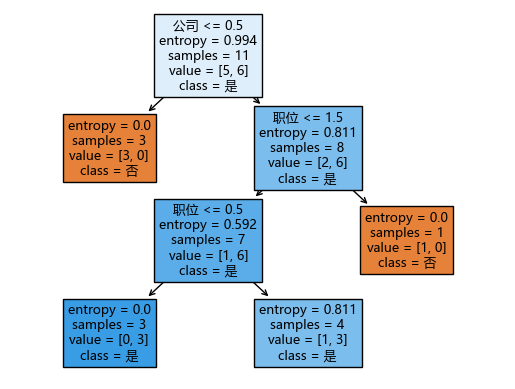

In [44]:
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Microsoft Yahei'
tree.plot_tree(clf_entropy, filled=True, 
               feature_names=feature_cols, class_names=['否', '是'])
plt.show()

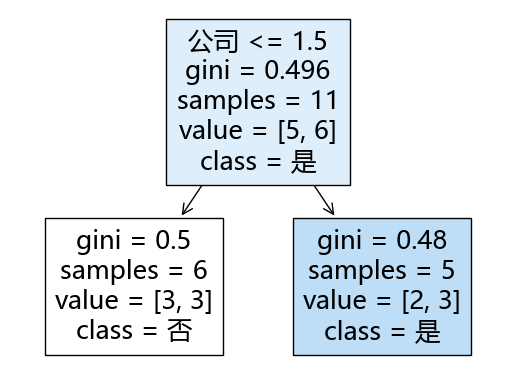

In [45]:
tree.plot_tree(clf_gini, filled=True, 
               feature_names=feature_cols, class_names=['否', '是'])
plt.show()

In [46]:
from sklearn.tree import export_text
r_entropy = export_text(clf_entropy, feature_names=feature_cols)
r_gini = export_text(clf_gini, feature_names=feature_cols)
print(r_entropy)

|--- 公司 <= 0.50
|   |--- class: 0
|--- 公司 >  0.50
|   |--- 职位 <= 1.50
|   |   |--- 职位 <= 0.50
|   |   |   |--- class: 1
|   |   |--- 职位 >  0.50
|   |   |   |--- class: 1
|   |--- 职位 >  1.50
|   |   |--- class: 0



In [47]:
print(r_gini)

|--- 公司 <= 1.50
|   |--- class: 0
|--- 公司 >  1.50
|   |--- class: 1



In [ ]:
# !conda install anaconda::graphviz
# !conda install python-graphviz

# graphviz  安装graphviz软件，包含命令行工具
#  python-graphviz  Python 中创建和可视化 Graphviz 图形

In [49]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf_entropy, out_file=None,
                           # feature_names=['company','job','degree'],
                           feature_names=feature_cols,
                           class_names=['否', '是'],
                           filled=True, rounded=True,
                           special_characters=True,
                           fontname='Microsoft Yahei'
                           )
print(dot_data)
graph = graphviz.Source(dot_data)
graph.render("data/salaries_entropy")

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="Microsoft Yahei"] ;
edge [fontname="Microsoft Yahei"] ;
0 [label=<公司 &le; 0.5<br/>entropy = 0.994<br/>samples = 11<br/>value = [5, 6]<br/>class = 是>, fillcolor="#deeffb"] ;
1 [label=<entropy = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = 否>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<职位 &le; 1.5<br/>entropy = 0.811<br/>samples = 8<br/>value = [2, 6]<br/>class = 是>, fillcolor="#7bbeee"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<职位 &le; 0.5<br/>entropy = 0.592<br/>samples = 7<br/>value = [1, 6]<br/>class = 是>, fillcolor="#5aade9"] ;
2 -> 3 ;
4 [label=<entropy = 0.0<br/>samples = 3<br/>value = [0, 3]<br/>class = 是>, fillcolor="#399de5"] ;
3 -> 4 ;
5 [label=<entropy = 0.811<br/>samples = 4<br/>value = [1, 3]<br/>class = 是>, fillcolor="#7bbeee"] ;
3 -> 5 ;
6 [label=<entropy = 0.0<br/>samples = 1<br/>value = [1, 0]<br/>c

'data\\salaries_entropy.pdf'

In [51]:
dot_data = export_graphviz(clf_gini, out_file=None,
                           # feature_names=['company','job','degree'],
                           feature_names=feature_cols,
                           class_names=['否', '是'],
                           filled=True, rounded=True,
                           special_characters=True,
                           fontname='Microsoft Yahei'
                           )
print(dot_data)
graph = graphviz.Source(dot_data)
graph.render("data/salaries_gini")

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="Microsoft Yahei"] ;
edge [fontname="Microsoft Yahei"] ;
0 [label=<公司 &le; 1.5<br/>gini = 0.496<br/>samples = 11<br/>value = [5, 6]<br/>class = 是>, fillcolor="#deeffb"] ;
1 [label=<gini = 0.5<br/>samples = 6<br/>value = [3, 3]<br/>class = 否>, fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.48<br/>samples = 5<br/>value = [2, 3]<br/>class = 是>, fillcolor="#bddef6"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


'data\\salaries_gini.pdf'